The idea behind this notebook was to get confortable with existing optimisation methods: https://docs.scipy.org/doc/scipy/reference/optimize.html.
Indeed, selecting alpha and the number of iterations in gradient descent migth get tricky. In additon, you can enjoy great speed improvement due to research in optimisation algorithm and vectorisation (numerical computation).  

The drawback is that your parameters needs to be 'rolled' into one vector.

In [1]:
import numpy as np
from scipy import optimize as op
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
X = boston_dataset['data']
y = boston_dataset['target']
print(X.shape)
print(y.shape)

(506, 13)
(506,)


I also wanted to learn a bit of plotting on the way. https://realpython.com/python-matplotlib-guide/ 

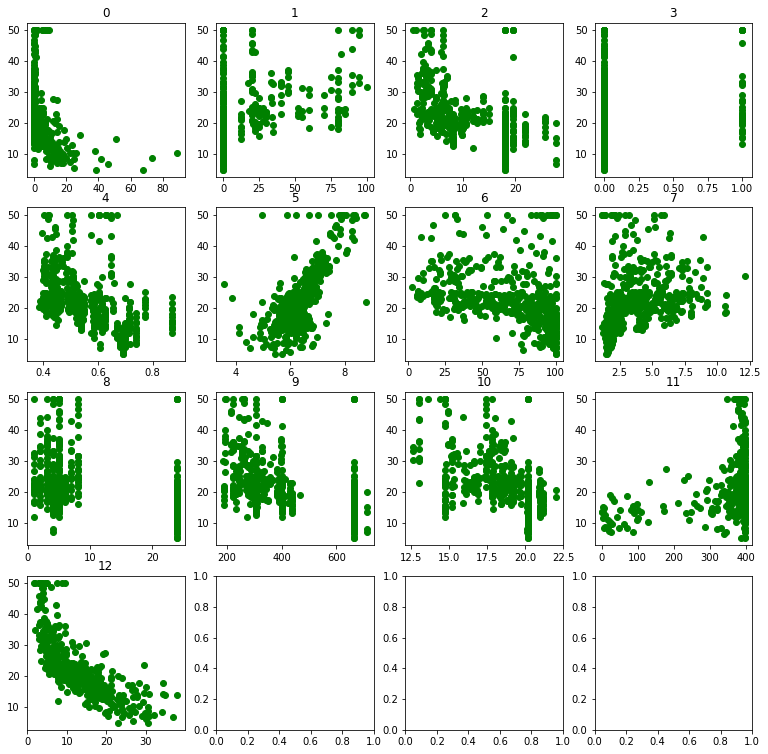

In [4]:
# let's learn a bit of matplotlib on the way..
fig, ax = plt.subplots(nrows=4, ncols=4,
                               figsize=(13, 13))
col = 0
row = 0

for i in range(X.shape[1]):
    ax[row, col].scatter(X[:,i], y, c='green')
    ax[row, col].set_title(i)
    col+=1
    if col % 4 == 0:
        row+=1
        col = 0
      
plt.show()

Adding intercept and initials parameter

In [5]:
m = X.shape[0]

intercept = np.ones((m, 1))
X = np.hstack((intercept, X))

n = X.shape[1]

theta = np.zeros([n])
theta.shape

print(m, n)

506 14


In [6]:
def predict(theta, X):
    theta = theta.reshape(n, 1)
    return X @ theta

In [7]:
def loss_function(theta, y, X):
    y = y.reshape(m, 1)
    theta = theta.reshape(n, 1)
    
    h = X @ theta
    cost_to_sum = (h-y)**2
    cost = cost_to_sum.sum() / (2 * m)
    
    return cost

In [8]:
def gradient(theta, y, X):
    y = y.reshape(m, 1)
    theta = theta.reshape(n, 1)
        
    grad = np.sum(X * (X @ theta - y), axis=0)
    
    return grad

This is where the magic happens..

In [9]:
def linear_regression(X, y, theta):
    result = op.minimize(fun=loss_function, x0=theta, args=(y, X), method='TNC', jac=gradient)
    return result.x

In [13]:
optimal_theta = linear_regression(X, y, theta)
print(optimal_theta)

[ 3.52166762e+01 -1.01585083e-01  4.85064115e-02 -1.56646666e-02
  2.75144424e+00 -1.07791086e+01  3.53026337e+00 -5.93138342e-03
 -1.44190816e+00  2.84785848e-01 -1.26604773e-02 -9.05166364e-01
  8.62931281e-03 -5.66042149e-01]


In [12]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X, y)
print(reg.coef_)

[ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]
